## <center> Tipsy Clustering: Uncovering the Grapevine of Wine Characteristics</center>

### Problem definition
- A wine dataset is provided. The task is to create an unsupervised machine learning algorithm to provide further insight into the data.

### Requirements 

1. Data Exploration
2. Prepare the dataset for machine learning
3. Create an unsupervised machine learning model 
4. Measure the accurancy of the model

### Deliverables 

1. Code on Github
2. Presentation


### Methodology

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to get insights
4. Prepare the data to better expose the underlying data partterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and short-list the best ones
7. Present your solution
8. Launch monitor, and maintain your system.

#### Frame the problem and look at the big picture

1. Define the objective in business terms.

Explore the data and create a unsupervised machine learning model.
As my knowlegde about wine caracteristics is limited I might need to explore the data caracteristics and undertsand how best to create.
Maybe I will also look at some examples available online.

2. How will your solution be used?

This is just an exercise, but if I have time I can try to deploy it to streamlit.

3. What are the current solutions/workarounds (if any)?

To be honest, I need to read more about unsupervised machine learning prior creating the model.

4. How should you frame this problem (supervised/unsupervised, online/offline,
etc.)?

This will be a unsupervised machine learning project as this is for a bootcamp assigment.

5. How should performance be measured?


6. Is the performance measure aligned with the business objective?

7. What would be the minimum performance needed to reach the business objec‐
tive?

8. What are comparable problems? Can you reuse experience or tools?

9. Is human expertise available?
No. Probably youtube, stack overflow will be my best friends.

10. How would you solve the problem manually?


11. List the assumptions you (or others) have made so far.

12. Verify assumptions if possible.


#### Get the Data

1. List the data you need and how much you need. Dat from Kaggle, we will look at all data for now.

2. Find and document where you can get that data. Data available on Kaggle.

3. Check how much space it will take. No need to worry about this.

4. Check legal obligations, and get authorization if necessary. No need to worry about this, public available.

5. Get access authorizations. No need to worry about this, public available.

6. Create a workspace (with enough storage space).

7. Get the data.

8. Convert the data to a format you can easily manipulate (without changing the
data itself).

9. Ensure sensitive information is deleted or protected (e.g., anonymized). No need to worry about this, public available.

10. Check the size and type of data (time series, sample, geographical, etc.).

11. Sample a test set, put it aside, and never look at it (no data snooping!).


##### Import all libraries 

Note that I will add libraries as long as I go

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot
import matplotlib as mpl
from sklearn.cluster import KMeans
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler


7. Get the data.

In [3]:
#Import red wine data
red_wine_data = pd.read_csv('wine_red.csv')

In [4]:
#Import white wine data
white_wine_data = pd.read_csv('wine_white.csv')

6. Create a workspace (with enough storage space).

I have created manually as per a youtube video. I still did not manage how to do this well.

8. Convert the data to a format you can easily manipulate (without changing the data itself).

Need to go back to tis, as I find difficult to understand how to do this.

10. Check the size and type of data.

In [5]:
# First 5 rows of the data
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
#Value counts of quality type
white_wine_data["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

11. Sample a test set, put it aside, and never look at it (no data snooping!).

Do I have to create a test and train in unsupervised learning?

Clearly. the answer depends on which class of unsupervised algorithms you are referring to.

For example, dimensionality reduction techniques are generally evaluated by computing the reconstruction error. You can do this using similar techniques with respect to supervised algorithms, e.g. by using an holdout test set, or by applying a k-fold cross validation procedure.
Clustering algorithms are more difficult to evaluate. Internal metrics [1] use only information on the computed clusters to evaluate if clusters are compact and well-separated (this is what is also mentioned on the answer of A.G. Ramakrishnan). Also, you can have external metrics that perform a statistical testing on the structure of your data [1].

Density estimation is also rather difficult to evaluate, but there are a wide range of techniques which are mostly used for model tuning [2], e.g. cross-validation procedures.

In addition, unsupervised strategies are sometimes used in the context of a more complex workflow, in which an extrinsic performance function can be defined. For example, if clustering is used to create meaningful classes (e.g. clustering documents), it is possible to create an external dataset by hand-labelling and test the accuracy (the so-called gold standard). Similarly, if dimensionality reduction is used as a pre-processing step in a supervised learning procedure, the accuracy of the latter can be used as a proxy performance measure for the dimensionality reduction technique.

[1] Halkidi, Maria, Yannis Batistakis, and Michalis Vazirgiannis. "On clustering validation techniques." Journal of Intelligent Information Systems 17.2-3 (2001): 107-145.
[2] Hall, Peter, Jeff Racine, and Qi Li. "Cross-validation and the estimation of conditional probability densities." Journal of the American Statistical Association 99.468 (2004).

#### Explore the Data

1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.

3. Study each attribute and its characteristics
Name

Type (categorical, int/float, bounded/unbounded, text, structured, etc.)

% of missing values

Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)

Possibly useful for the task?

Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [9]:
#Look that all categories are complete 
white_wine_data.info()

#Type of data:12 variables, all float data except one variable interger

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Missing values

In [10]:
red_wine_data.isnull().sum()

# no missing values for red wine data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
white_wine_data.isnull().sum()
# no missing values for white wine data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
white_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [14]:
## Plot the describe data of redwine data but it doesnt show me the values collumn 

data_head = red_wine_data.describe()
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 5), colorscale=colorscale)
py.iplot(df_table, filename='red_wine_data.csv')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]],1), colorscale=colorscale)
py.iplot(df_table, filename='red_wine_data.csv')

In [15]:
## Plot the describe data of whitewine data but it doesnt show me the values collumn 

data_head = white_wine_data.describe()
colorscale = [[0, '#7BAA3E'],[.5, '#F0DFD6'],[1, '#E6D1BC']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 3), colorscale=colorscale)
py.iplot(df_table, filename='white_wine_data.csv')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]], 3), colorscale=colorscale)
py.iplot(df_table, filename='white_wine_data.csv')

Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)

To be honest, I am still not sure how best to look dof noiseness in the data,I think probably I have to read more about it

In [16]:
#calculate MAD for all columns
white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(robust.mad)

fixed acidity            0.741301
volatile acidity         0.088956
citric acid              0.088956
residual sugar           5.337368
chlorides                0.010378
free sulfur dioxide     16.308624
total sulfur dioxide    42.995464
density                  0.003173
pH                       0.148260
sulphates                0.103782
alcohol                  1.482602
quality                  1.482602
dtype: float64

In [17]:
#calculate MAD for all columns
red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(robust.mad)

fixed acidity            1.482602
volatile acidity         0.177912
citric acid              0.252042
residual sugar           0.444781
chlorides                0.014826
free sulfur dioxide     10.378216
total sulfur dioxide    26.686840
density                  0.001675
pH                       0.148260
sulphates                0.118608
alcohol                  1.037822
quality                  1.482602
dtype: float64

4. For supervised learning tasks, identify the target attribute(s).

This in an unsupervised task

In [18]:
# I choose to do a Shapiro-wilk test to evaluate if the sample data comes from normal distribution

# Extract the columns we want to test
cols = ['quality', 'free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'fixed acidity', 'alcohol']
data = red_wine_data[cols]

# Loop through each column and perform the Shapiro-Wilk test
for col in cols: # create a loop 
    stat, p = shapiro(data[col]) #stats refers tothe testa statistic whic is shapiro
    print(f'{col}:') 
    print('Shapiro-Wilk test statistic:', stat)
    print('p-value:', p)
    if p > 0.05:
        print('The data is likely normally distributed')
    else:
        print('The data is likely not normally distributed')

## although the data seems normally distributed, none of the data variables it is 


quality:
Shapiro-Wilk test statistic: 0.8575938940048218
p-value: 9.524199756965729e-36
The data is likely not normally distributed
free sulfur dioxide:
Shapiro-Wilk test statistic: 0.9018418192863464
p-value: 7.699692533903026e-31
The data is likely not normally distributed
total sulfur dioxide:
Shapiro-Wilk test statistic: 0.8732250332832336
p-value: 3.573768919849872e-34
The data is likely not normally distributed
residual sugar:
Shapiro-Wilk test statistic: 0.5660766363143921
p-value: 0.0
The data is likely not normally distributed
fixed acidity:
Shapiro-Wilk test statistic: 0.9420264959335327
p-value: 1.5227779442162196e-24
The data is likely not normally distributed
alcohol:
Shapiro-Wilk test statistic: 0.9288375377655029
p-value: 6.63998167657323e-27
The data is likely not normally distributed


5. Visualize the data.


Type of distribution (Gaussian, uniform, logarithmic, etc.)

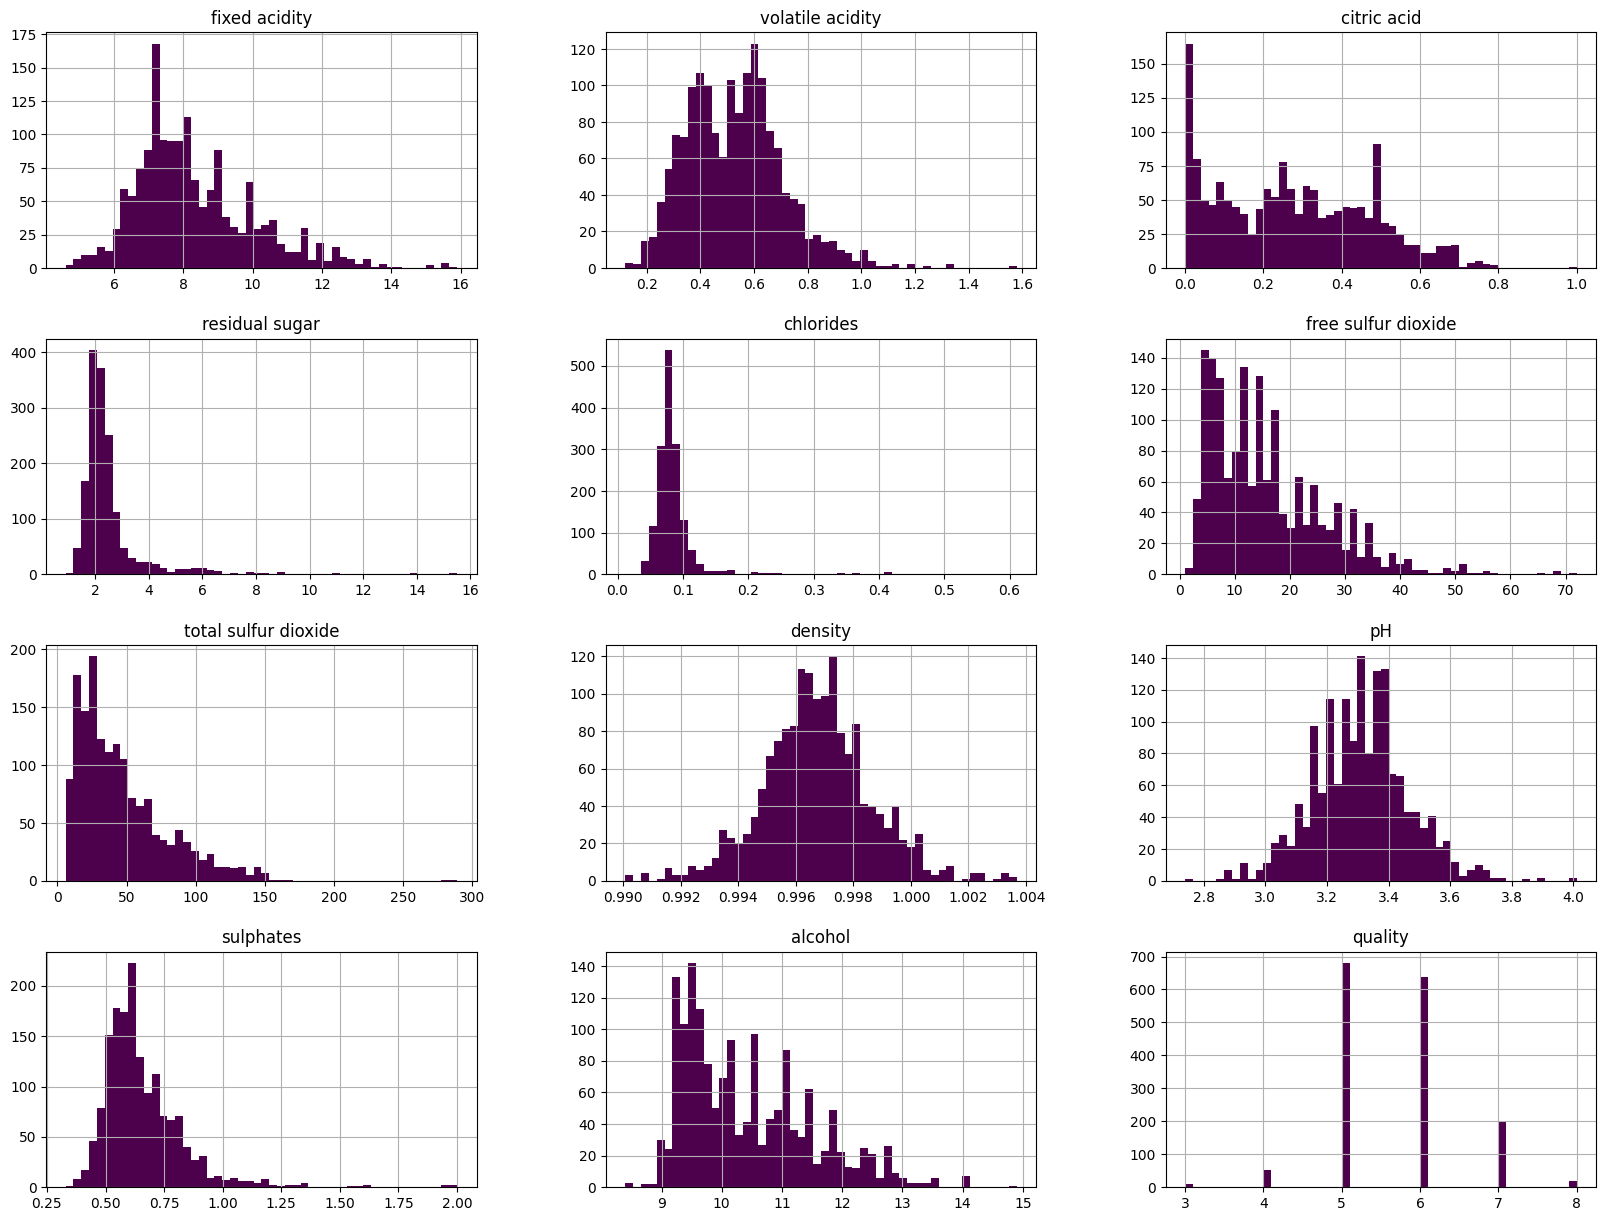

In [19]:
red_wine_data.hist(bins=50,figsize=(20,15),color = "#4d004c")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

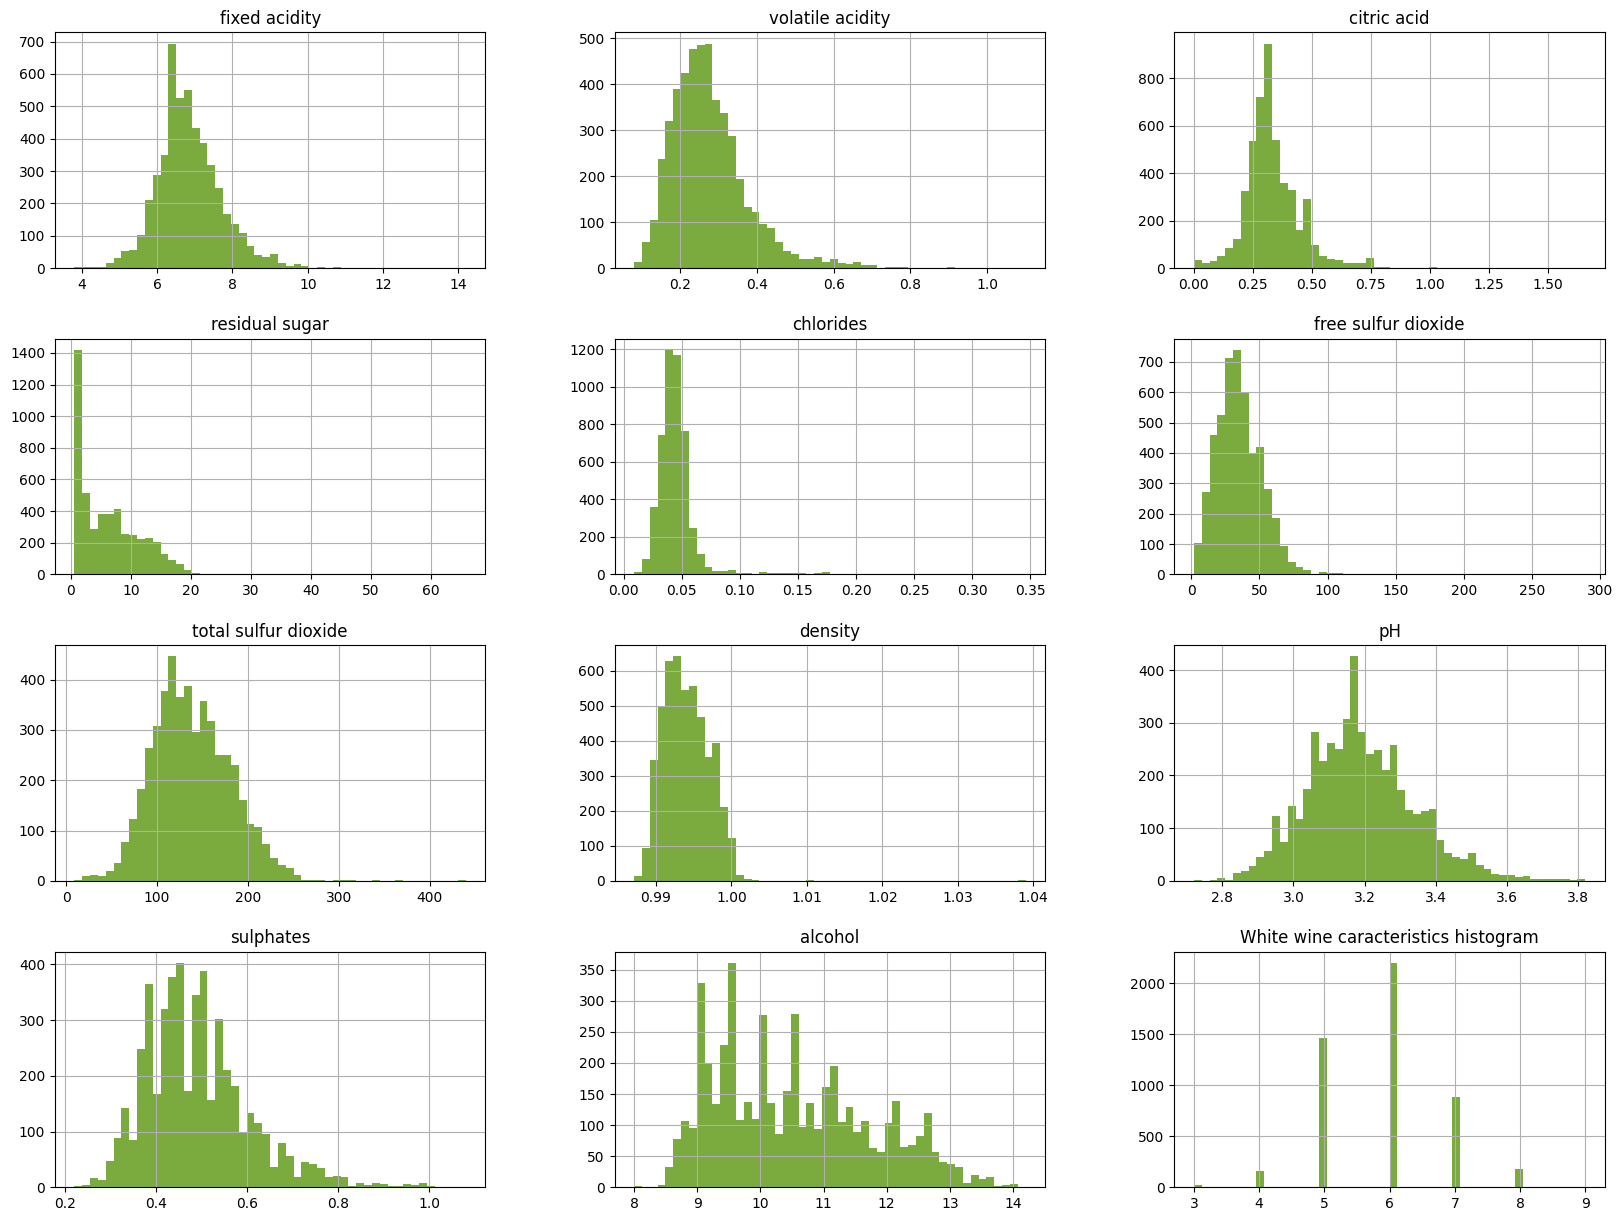

In [20]:
white_wine_data.hist(bins=50,figsize=(20,15),color='#7BAA3E')

# Adding title to the plot
plt.title('White wine caracteristics histogram')

plt.show

[Text(0.5, 1.0, 'Caracteristics white wine')]

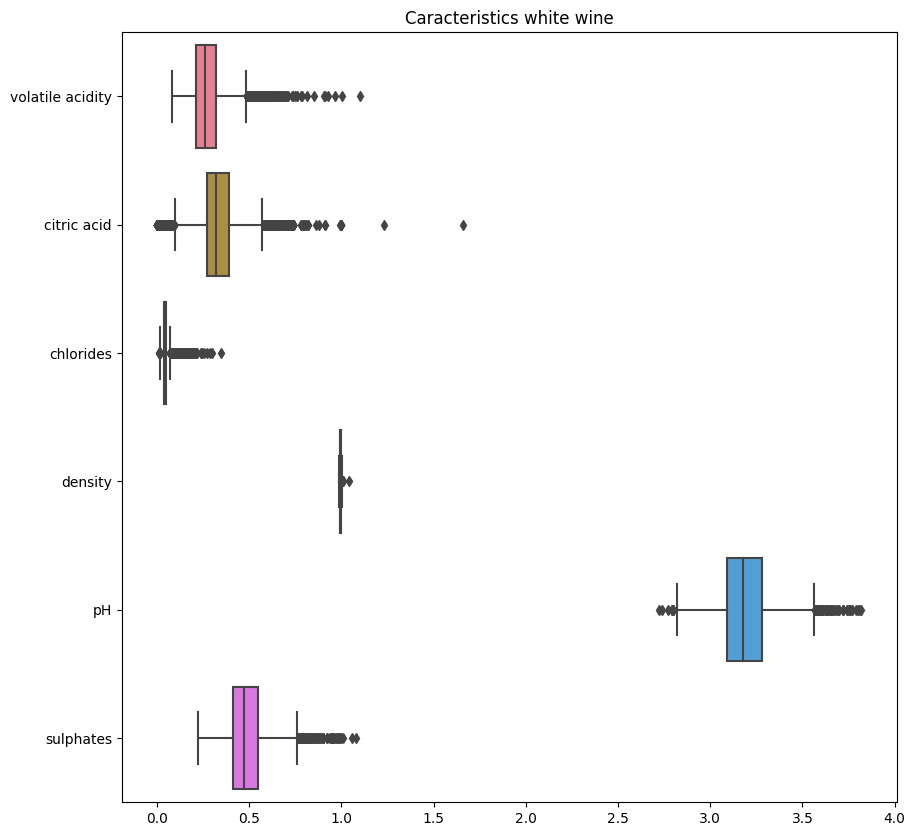

In [21]:
#wHITE WINE caracteristics boxplots
plt.figure(figsize=(10,10))
# add title using suptitle

sns.boxplot(data=white_wine_data.drop(columns=['quality','free sulfur dioxide','total sulfur dioxide', 'residual sugar','fixed acidity','alcohol']), orient='horizontal', palette='husl').set(title='Caracteristics white wine')

[Text(0.5, 1.0, 'Caracteristics red wine')]

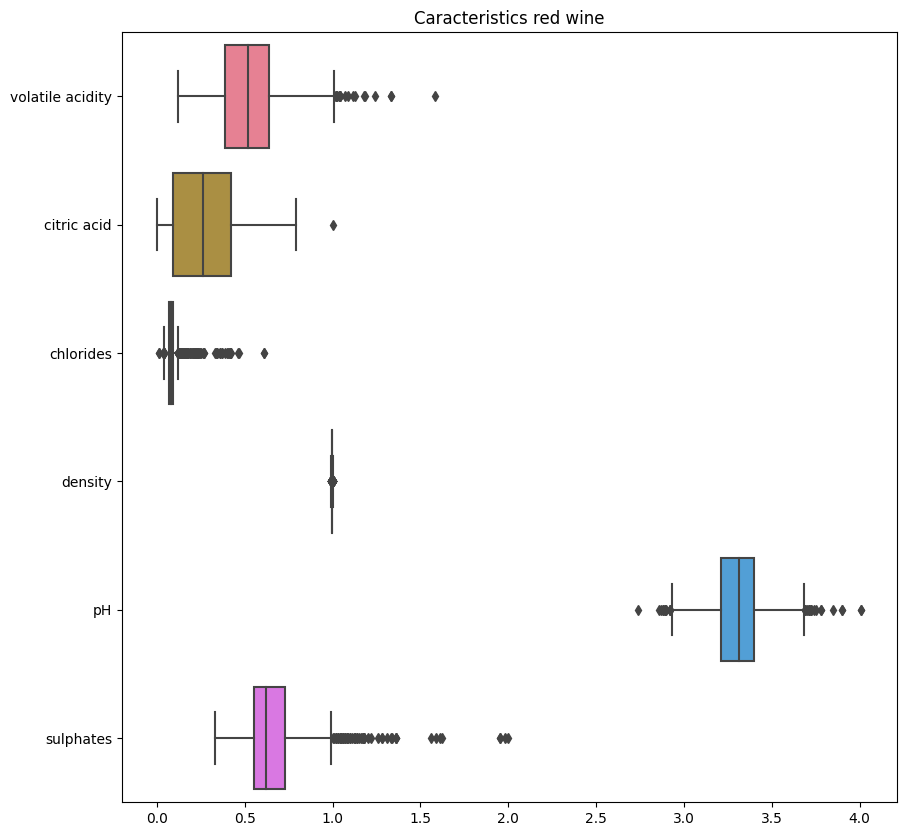

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(data=red_wine_data.drop(columns=['quality','free sulfur dioxide','total sulfur dioxide', 'residual sugar','fixed acidity','alcohol']), orient='horizontal', palette='husl').set(title='Caracteristics red wine')

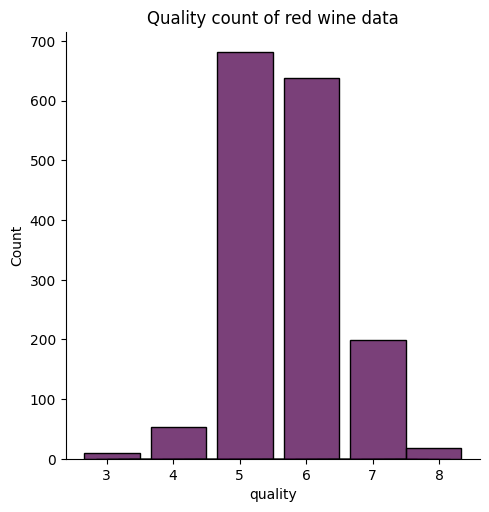

In [23]:
#bar chart of quality
sns.displot(red_wine_data, x="quality",shrink=5,color = "#4d004c").set(title='Quality count of red wine data')

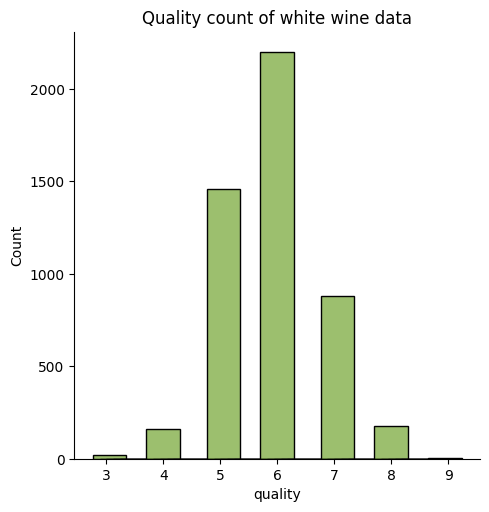

In [24]:
#bar chart of quality
sns.displot(white_wine_data, x="quality",shrink=5,color = '#7BAA3E').set(title='Quality count of white wine data')

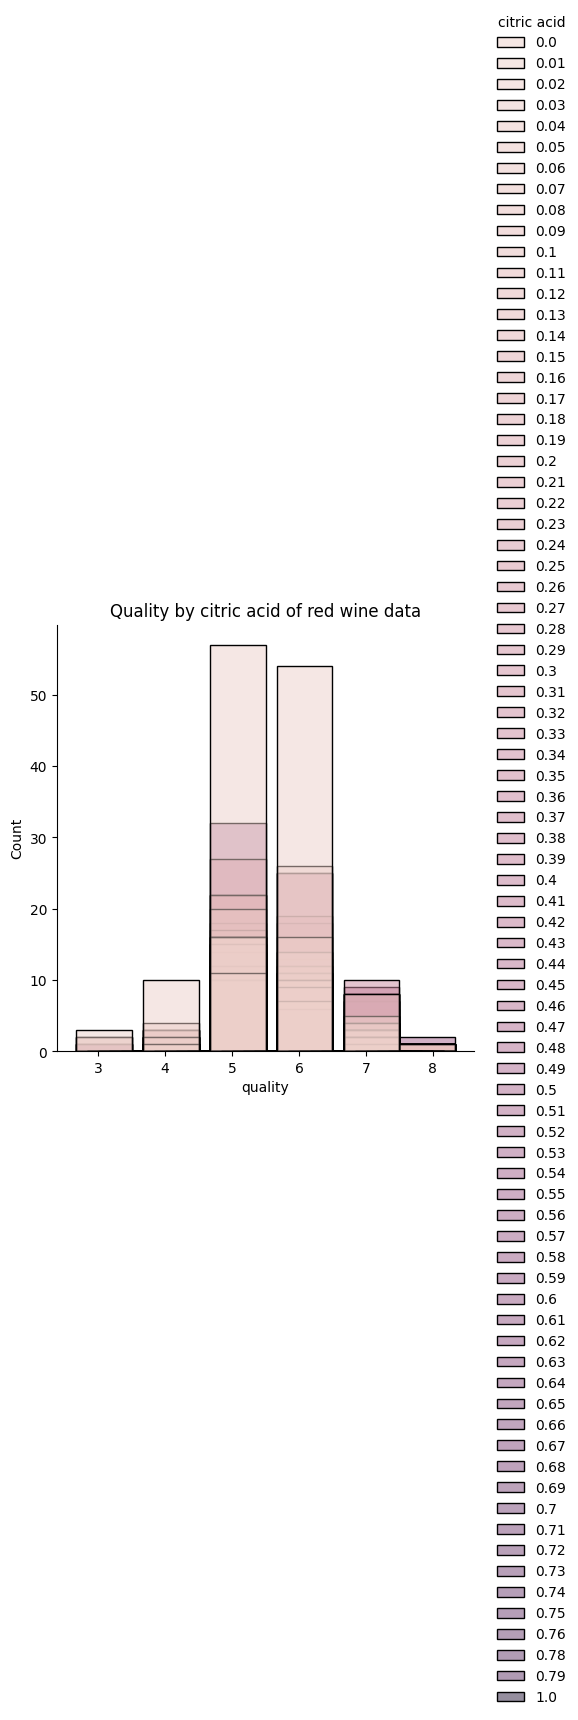

In [25]:
#bar chart of quality
sns.displot(red_wine_data, x="quality",shrink=5,hue='citric acid').set(title='Quality by citric acid of red wine data')

6. Study the correlations between attributes.

In [26]:
#Correlation values with qualityfor the white data
corr_matrix_white = white_wine_data.corr()
corr_matrix_white["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap white wine')

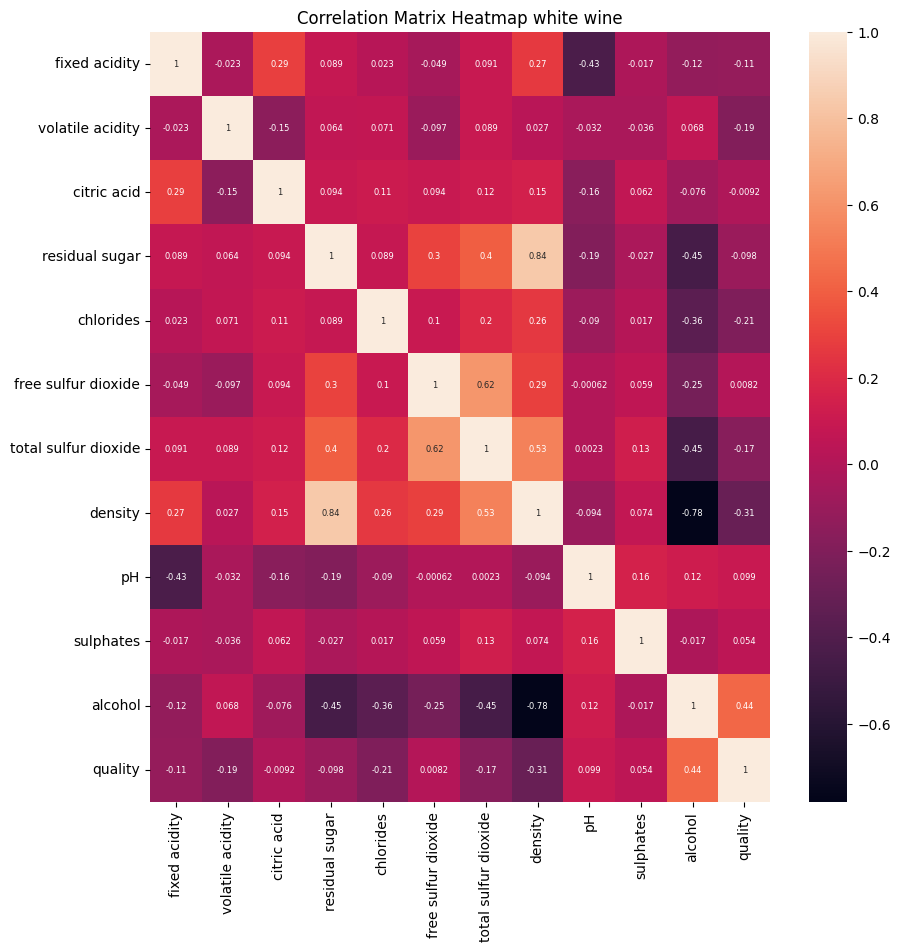

In [27]:
#Correlation matrix heatmap for white wine
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix_white, annot=True, annot_kws={'size': 6})
plt.title("Correlation Matrix Heatmap white wine", loc="center")

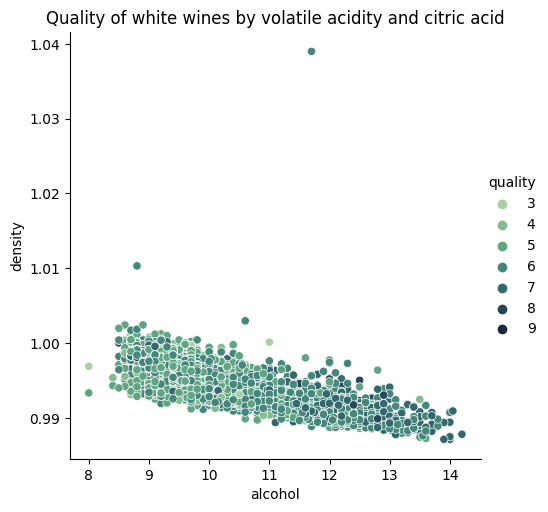

In [28]:
sns.relplot(
    data=white_wine_data,
    x="alcohol", y="density",
    hue="quality", palette="ch:r=-.5,l=.75"
).set(title='Quality of white wines by volatile acidity and citric acid')

Text(0.5, 1.0, 'Correlation Matrix Heatmap Red wine')

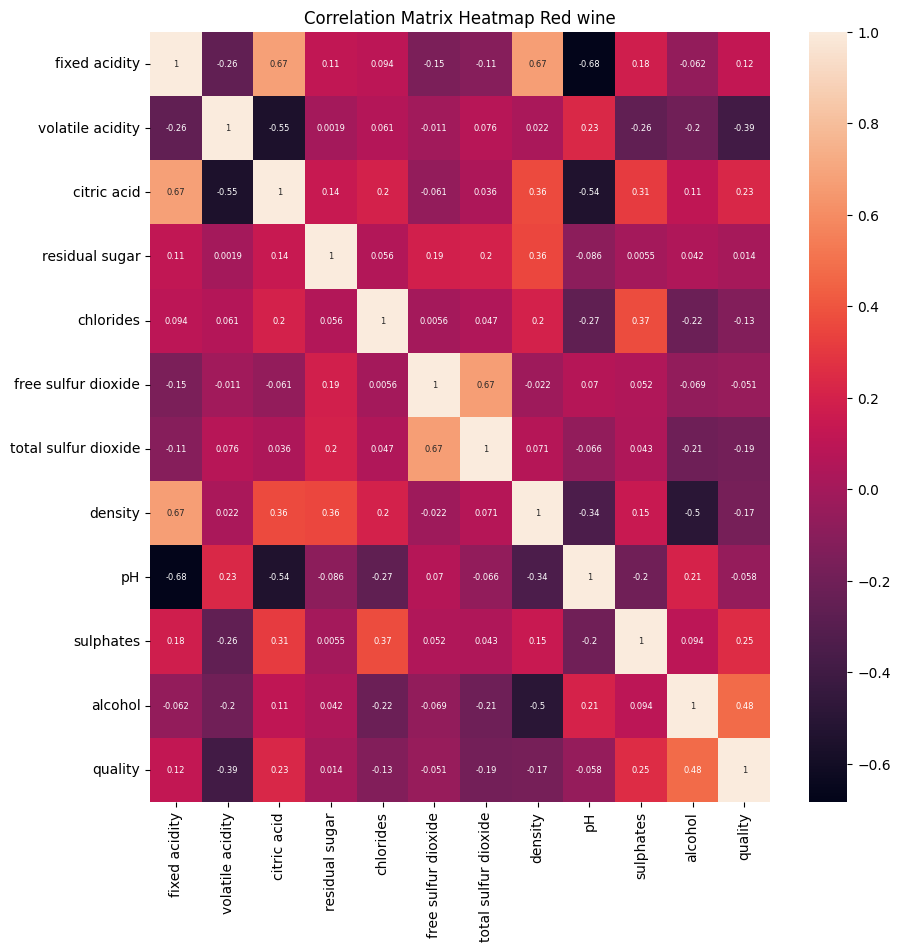

In [36]:
#Correlation matrix heatmap for red wine
corr_matrix_red = red_wine_data.corr()
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix_red, annot=True, annot_kws={'size': 6})
plt.title("Correlation Matrix Heatmap Red wine", loc="center")

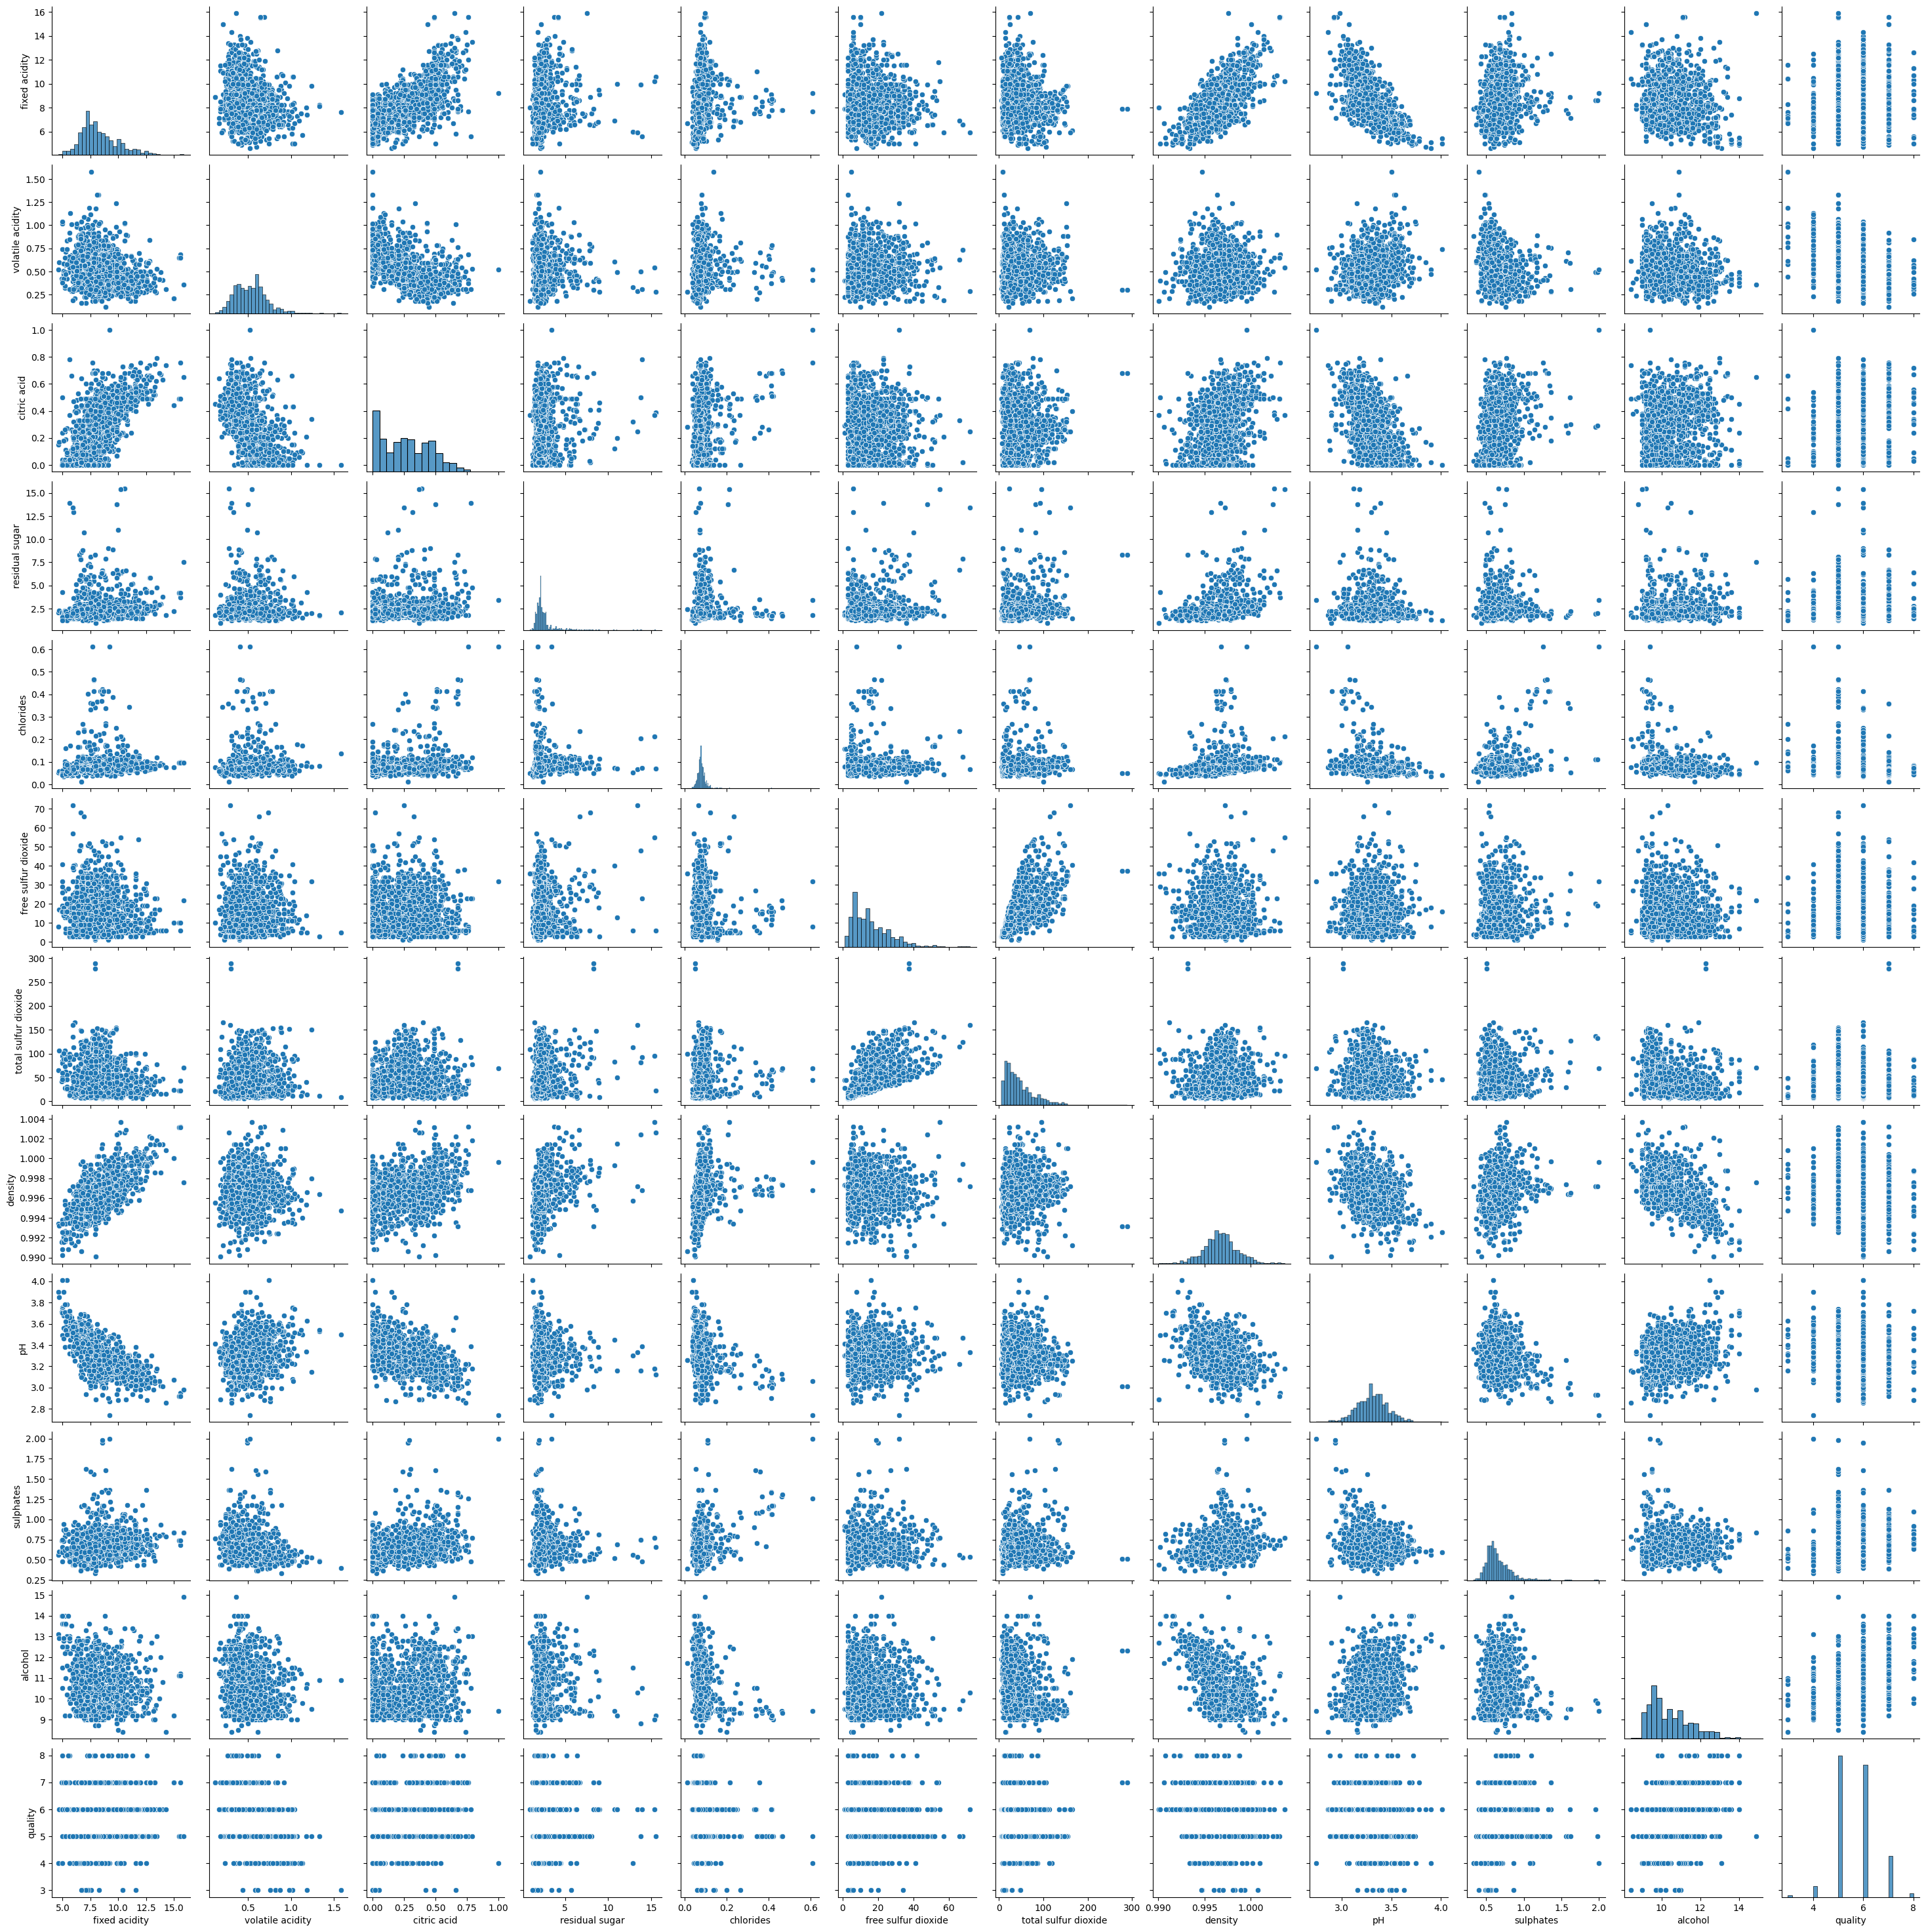

: 

In [37]:
sns.pairplot(red_wine_data)
plt.show()

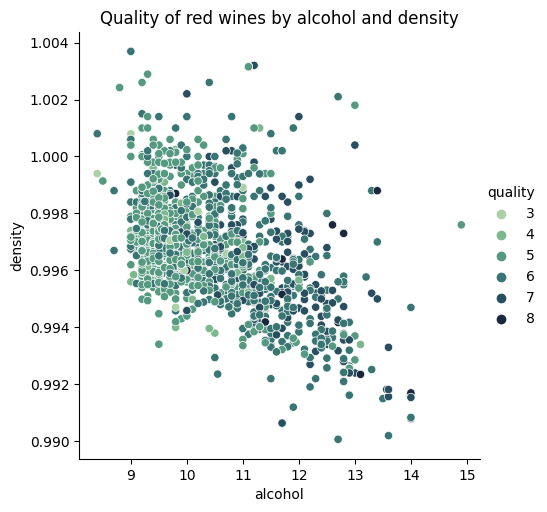

In [ ]:
sns.relplot(
    data=red_wine_data,
    x="alcohol", y="density",
    hue="quality", palette="ch:r=-.5,l=.75"
).set(title='Quality of red wines by alcohol and density')

7. Study how you would solve the problem manually.

As I am not a wine expert I have decided to do the following:

1. Ask chat GPT what variables mean.

Sure, based on the variable names, it seems that the input variables represent physicochemical properties of wine, which are likely measured through various tests and experiments. Here's a brief explanation of each input variable:

Fixed acidity: The concentration of non-volatile acids in the wine, which contribute to its overall acidity.

Volatile acidity: The concentration of volatile acids in the wine, which can contribute to a sour or vinegary taste if present in high amounts.

Citric acid: The concentration of citric acid, which is a weak organic acid that can contribute to the tartness and freshness of the wine.

Residual sugar: The amount of sugar that remains in the wine after fermentation is complete, which can affect its sweetness and balance.

Chlorides: The concentration of salt in the wine, which can affect its taste and mouthfeel.

Free sulfur dioxide: The amount of sulfur dioxide that is not bound to other molecules in the wine, which can act as a preservative and antioxidant.

Total sulfur dioxide: The total amount of sulfur dioxide in the wine, including both free and bound forms.

Density: The mass of the wine per unit volume, which can indicate its alcohol content and sugar concentration.

pH: The level of acidity or basicity of the wine, which can affect its stability and sensory properties.

Sulphates: The concentration of sulfates in the wine, which can affect its taste and act as a preservative.

Alcohol: The percentage of alcohol in the wine, which can affect its flavor, aroma, and body.

The output variable, on the other hand, is based on sensory data and represents a quality score between 0 and 10. 
It is likely determined through human evaluation and tasting, where tasters assign a score based on various sensory characteristics of the wine, such as its aroma, taste, balance, and complexity. The quality score can be subjective and may vary depending on the taster's preferences and experience.


Overall, a high-quality wine is one that exhibits a harmonious balance of flavors and aromas, reflects the unique characteristics of its terroir and grape varietal, and has the potential to improve with age. However, the specific characteristics that contribute to quality can vary depending on the wine style and individual preferences.

It difficult to classify wines manually, particullary because of lack of expertise and may due lack of significant correlations, perphaps because quality is somehow bias and dependent on the person who evaluates.




8. Identify the promising transformations you may want to apply.

Maybe I could classify the quality rates or by creating varibles looking at alcohol (%).

9. Identify extra data that would be useful (go back to “Get the Data” on page 506).

Balance: A well-balanced wine has a harmonious interplay between its acidity, tannins, alcohol, and fruit flavors, with no single component dominating the others.

Complexity: A wine that exhibits complexity has multiple layers of flavors and aromas that evolve and change over time, providing a rich and nuanced drinking experience.

Depth: A wine with depth has a rich and concentrated flavor profile that reflects the complexity and intensity of the grapes and the winemaking process.

Terroir: The unique characteristics of the vineyard and its environment, such as soil type, climate, and topography, can contribute to a wine's distinctive flavor profile and overall quality.

Aging potential: Some high-quality wines have the ability to improve with age, developing new flavors and aromas as they mature in the bottle.

Fruit quality: The quality of the grapes and their ripeness at the time of harvest can significantly impact the flavor and aroma profile of the wine.

Winemaking technique: The winemaking process, including fermentation, barrel aging, and blending, can influence the flavor, aroma, and texture of the wine.

10. Document what you have learned.

### Prepare the Data

Notes:

• Work on copies of the data (keep the original dataset intact).

• Write functions for all data transformations you apply, for five reasons:

— So you can easily prepare the data the next time you get a fresh dataset

— So you can apply these transformations in future projects

— To clean and prepare the test set

— To clean and prepare new data instances once your solution is live

— To make it easy to treat your preparation choices as hyperparameters


1. Data cleaning:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).


I also asked: so in using k means i dont have to fix or remove outliers?

It's generally a good idea to remove or fix outliers before using K-means clustering, as outliers can have a strong influence on the clustering results and can distort the clusters.

However, the specific approach to handling outliers will depend on the characteristics of your data and the goals of your analysis. In some cases, it may be appropriate to keep outliers in the dataset, or to transform the data in a way that reduces the impact of outliers.

Before applying K-means clustering to your data, it's a good idea to explore the data and identify any outliers or unusual data points. You can use various visualization tools, such as scatterplots or boxplots, to identify potential outliers. Once you have identified potential outliers, you can decide whether to remove them, fix them, or keep them in the dataset based on your specific goals and the characteristics of your data.

In any case, it's important to carefully consider the potential impact of outliers on your clustering results and to evaluate the robustness of your clustering algorithm to different approaches to handling outliers.

If you have non-normally distributed data and want to fix or remove outliers, there are several approaches you can consider:

1. Winsorization: This involves replacing the extreme values with the nearest non-extreme value. For example, you can replace values above the 95th percentile with the value at the 95th percentile, and replace values below the 5th percentile with the value at the 5th percentile.
However, it's important to use caution when applying Winsorization, as it can also introduce bias or distortions in some cases.

2. Transformation: You can transform the data to a more normal distribution, and then use more standard outlier detection techniques such as the Z-score method or the interquartile range (IQR) method. Common transformations include logarithmic or exponential transformations.

3. Non-parametric outlier detection: This involves using statistical methods that do not assume a specific underlying distribution of the data. One example is the median absolute deviation (MAD) method, which involves calculating the median of the absolute deviations from the median.

4. Robust regression: You can use robust regression methods that are less sensitive to outliers, such as the M-estimator or the Huber estimator.

It's important to note that the best approach will depend on the specific characteristics of your data and the goals of your analysis. In any case, it's a good idea to carefully evaluate the impact of outliers on your analysis and to test different approaches to handling outliers to see which works best for your specific situation.

In [ ]:
#Log transformation for red wine data

#red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'
#]] = red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(np.log)

In [ ]:
#Log transformation for white wine data
#
#white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'
]] = white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(np.log)

In [ ]:
##the winsorization did not work because this assume it was done in numpy when our data is in pandas, so you have to understand how is your data type to then  
# choose the right code to use

data = red_wine_data

clip_percent = 5
clip_min = np.percentile(data, clip_percent)
clip_max = np.percentile(data, 100 - clip_percent)

# apply Winsorization to the data
#data_winsorized = winsorize(data, (clip_percent, 100 - clip_percent))

In [ ]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
print(type(red_wine_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
##the winsorization for red wine data with high variability
# specify the percentage of values to clip (e.g. 5% from both ends)
clip_percent = 5

# convert clip percent to fraction
clip_fraction = clip_percent / 100

# apply Winsorization to the columns
for col in ['fixed acidity', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide','quality']:
    clip_min = np.percentile(red_wine_data[col], clip_percent)
    clip_max = np.percentile(red_wine_data[col], 100 - clip_percent)
    red_wine_data[col] = winsorize(red_wine_data[col], (clip_fraction, clip_fraction))

In [ ]:
##the winsorization for white wine data with high variability
# specify the percentage of values to clip (e.g. 5% from both ends)
clip_percent = 5

# convert clip percent to fraction
clip_fraction = clip_percent / 100

# apply Winsorization to the columns
for col in ['residual sugar','alcohol', 'free sulfur dioxide', 'total sulfur dioxide','quality']:
    clip_min = np.percentile(white_wine_data[col], clip_percent)
    clip_max = np.percentile(white_wine_data[col], 100 - clip_percent)
    white_wine_data[col] = winsorize(white_wine_data[col], (clip_fraction, clip_fraction))

 2. Feature selection (optional):
• Drop the attributes that provide no useful information for the task.

Feature selection is the process of selecting a subset of relevant features (predictor variables) to use in the model building process. It is an important step in data preprocessing that helps to improve the accuracy and efficiency of the model by reducing the dimensionality of the data.

Feature selection can be done using various techniques such as:

1. Univariate feature selection: It selects the features based on their individual relationship with the target variable using statistical tests like chi-squared test, ANOVA F-test, etc.

2. Recursive feature elimination: It recursively removes the least important features from the dataset until the desired number of features is obtained.

3. Principal component analysis (PCA): It reduces the dimensionality of the data by transforming the original features into a set of new features that are linearly uncorrelated and explain maximum variance in the data.

Feature importance ranking: It ranks the features based on their importance using algorithms like decision trees, random forests, etc.

Overall, feature selection helps to reduce the complexity of the model, improve its interpretability, and prevent overfitting.

3. Feature engineering, where appropriate:
• Discretize continuous features.
• Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x
• Aggregate features into promising new features.

Feature engineering is the process of creating new features (predictor variables) from the existing data features that can help to improve the performance of the model. It involves transforming the raw data into a more meaningful representation that captures the underlying patterns and relationships in the data.

Feature engineering can involve a wide range of techniques such as:

Feature scaling: It involves scaling the features to a common scale to prevent the dominance of one feature over the others.

Encoding categorical variables: It involves converting categorical variables into numerical variables that can be used in the model. This can be done using techniques like one-hot encoding, label encoding, etc.

Imputing missing values: It involves filling in the missing values in the data using techniques like mean imputation, median imputation, etc.

Feature extraction: It involves extracting relevant features from the data using techniques like Fourier transform, wavelet transform, etc.

Feature aggregation: It involves combining multiple features into a single feature that captures the underlying patterns in the data.

Overall, feature engineering helps to improve the performance of the model by providing it with relevant and meaningful information about the data. It is an important step in the machine learning pipeline and can often have a significant impact on the accuracy and efficiency of the model.

4. Feature scaling: standardize or normalize features.

Feature scaling is the process of scaling or normalizing the input features to have similar ranges, which can help improve the performance of machine learning algorithms. There are different methods for feature scaling, but two common approaches are standardization and normalization.

Standardization scales the features so that they have zero mean and unit variance. This means that the transformed features have a mean of 0 and a standard deviation of 1. This approach is commonly used when the distribution of the features is close to a normal distribution.

Normalization scales the features so that they have values between 0 and 1. This approach is commonly used when the features have different ranges and it is important to preserve the relative differences between the values of the features.

I asked: if the data is not normally distributed, should I normalize it for unsupervised machine learning?

If your data is not normally distributed, normalization may not be the best approach for preparing it for unsupervised machine learning. Normalization methods such as z-score normalization or min-max scaling assume that the data is normally distributed, so applying these methods to non-normal data can lead to skewed or distorted results. In general, if your data is not normally distributed, you may want to consider alternative methods.

Feature scaling is recommended for k-means algorithm, there are two commom ways:
1. Standardizatin
2. Normalization 

In [ ]:
#tandardization of data: first substracts the mean value and thendivides by the strandart deviation so thatresulting distribution has unit variance. Much less affected by outliers.
# create the StandardScaler object
datascalewine = data
scaler = StandardScaler()

#fit and transform the data using the scaler object
data_scaled = scaler.fit_transform(datascalewine)

In [ ]:
# Load
dataRaw = np.loadtxt('wine_red.csv', delimiter=',', dtype='object')
header = dataRaw[0,:]
data = dataRaw[1:,:2]
data = np.vstack(data.astype(np.float32))

In [ ]:
header

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
data

array([[7.4  , 0.7  ],
       [7.8  , 0.88 ],
       [7.8  , 0.76 ],
       ...,
       [6.3  , 0.51 ],
       [5.9  , 0.645],
       [6.   , 0.31 ]], dtype=float32)

Text(0, 0.5, 'quality')

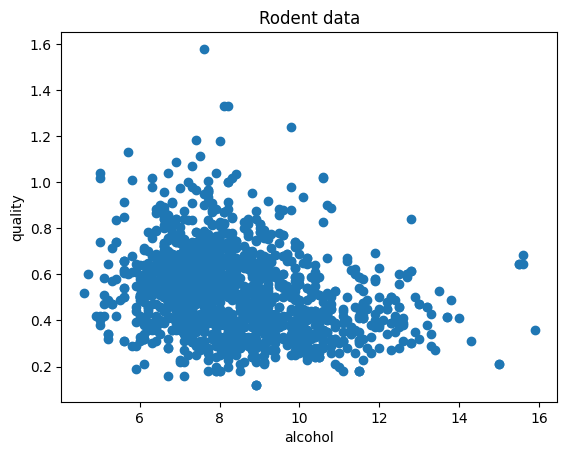

In [ ]:
# Plot
fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1])
ax.set_title('Rodent data')
ax.set_xlabel(header[10])
ax.set_ylabel(header[11])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(data)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)


WCSS:  937.28759765625
Iternations until converged:  6
Final centroids: 
[[ 8.915206    0.51313955]
 [11.575       0.4267634 ]
 [ 7.018015    0.5656189 ]]
Cluster assignments 
[2 2 2 ... 2 2 2]


Text(0, 0.5, 'volatile acidity')

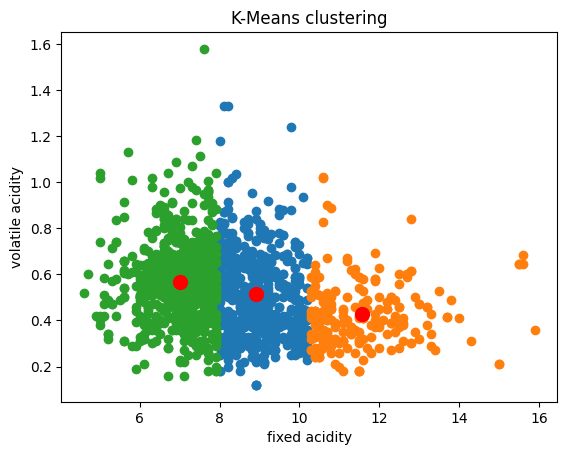

In [ ]:
fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = data[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,1])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

#Aesthetics    
ax.set_title('K-Means clustering')
ax.set_xlabel(header[0])
ax.set_ylabel(header[1])